# <center><font color = Red> Heart Dataset

## Libraries

In [111]:
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,plot_confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve ,precision_score, f1_score,recall_score,auc


import matplotlib.pyplot as plt
import seaborn as sns

import json
import pickle

import warnings
warnings.filterwarnings("ignore")

## Problem Statment

### <font color = Green> To predict the Patient is Suffering from Heart Disease or not by using various independent variables:

## Data_Gathering

In [112]:
df = pd.read_csv("heart.csv")
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

##  EDA

In [113]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:xlabel='target', ylabel='count'>

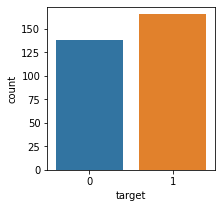

In [115]:
plt.figure(figsize=(3,3))
sns.countplot(x =df['target'])

In [116]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### <font color = Red> Age

In [117]:
df['age']

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

<AxesSubplot:xlabel='age'>

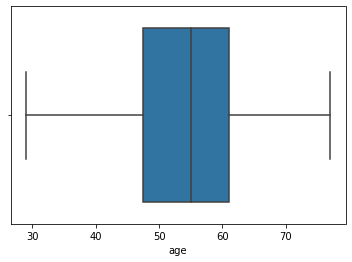

In [118]:
sns.boxplot(x = df['age'])

### <font color = Red> Sex

<AxesSubplot:xlabel='sex'>

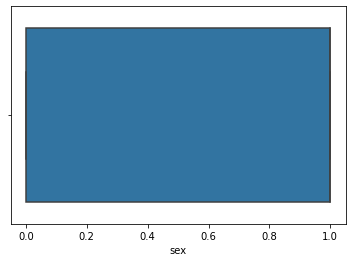

In [119]:
sns.boxplot(x = df['sex'])

### <font color = Red> CP

<AxesSubplot:xlabel='cp'>

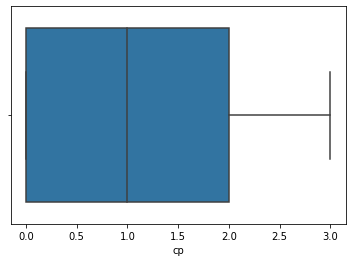

In [120]:
sns.boxplot(x = df['cp'])

### <font color = Red> trestbps

<AxesSubplot:xlabel='trestbps'>

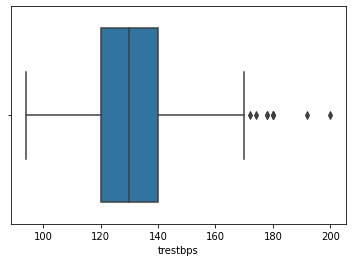

In [121]:
sns.boxplot(x = df['trestbps'])

In [122]:
###finding Extreme Outliers

q1 = df['trestbps'].quantile(0.25)
q2 = df['trestbps'].quantile(0.50)
q3 = df['trestbps'].quantile(0.75)
median =  df['trestbps'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print('*'*50)

print("Median :",median)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print('*'*50)
print("UPPER TAIL :",upper_tail)
print("LOWER TAIL :",lower_tail)

Q1 : 120.0
Q2 : 130.0
Q3 : 140.0
**************************************************
Median : 130.0
**************************************************
UPPER TAIL : 170.0
LOWER TAIL : 90.0


In [123]:
df.loc[df['trestbps'] > upper_tail]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
8     52    1   2       172   199    1        1      162      0      0.5   
101   59    1   3       178   270    0        0      145      0      4.2   
110   64    0   0       180   325    0        1      154      1      0.0   
203   68    1   2       180   274    1        0      150      1      1.6   
223   56    0   0       200   288    1        0      133      1      4.0   
241   59    0   0       174   249    0        1      143      1      0.0   
248   54    1   1       192   283    0        0      195      0      0.0   
260   66    0   0       178   228    1        1      165      1      1.0   
266   55    0   0       180   327    0        2      117      1      3.4   

     slope  ca  thal  target  
8        2   0     3       1  
101      0   0     3       1  
110      2   0     2       1  
203      1   0     3       0  
223      0   2     3       0  
241      1   0     2       0  
248      2   1     3       0  
260      1   2     3       0  
266      1   0     2       0

In [124]:
df[['trestbps']].loc[df['trestbps'] > upper_tail]

trestbps
8         172
101       178
110       180
203       180
223       200
241       174
248       192
260       178
266       180

In [125]:
median_trestbps = df.loc[df['trestbps'] <= upper_tail,'trestbps'].median()
median_trestbps

130.0

In [126]:
df.loc[df['trestbps'] > upper_tail,'trestbps'] = median_trestbps

df.loc[df['trestbps'] > upper_tail,'trestbps']

Series([], Name: trestbps, dtype: int64)

<AxesSubplot:xlabel='trestbps'>

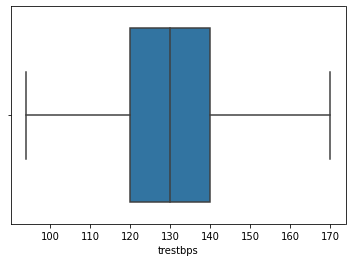

In [127]:
sns.boxplot(df["trestbps"])

### <font color = Red> chol

<AxesSubplot:xlabel='chol'>

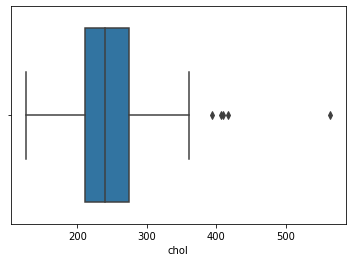

In [128]:
sns.boxplot(df["chol"])

In [129]:
###finding Extreme Outliers

q1 = df['chol'].quantile(0.25)
q2 = df['chol'].quantile(0.50)
q3 = df['chol'].quantile(0.75)
median =  df['chol'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print('*'*50)

print("Median :",median)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print('*'*50)
print("UPPER TAIL :",upper_tail)
print("LOWER TAIL :",lower_tail)

Q1 : 211.0
Q2 : 240.0
Q3 : 274.5
**************************************************
Median : 240.0
**************************************************
UPPER TAIL : 369.75
LOWER TAIL : 115.75


In [130]:
df.loc[df['chol'] > upper_tail]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
28    65    0   2       140   417    1        0      157      0      0.8   
85    67    0   2       115   564    0        0      160      0      1.6   
96    62    0   0       140   394    0        0      157      0      1.2   
220   63    0   0       150   407    0        0      154      0      4.0   
246   56    0   0       134   409    0        0      150      1      1.9   

     slope  ca  thal  target  
28       2   1     2       1  
85       1   0     3       1  
96       1   0     2       1  
220      1   3     3       0  
246      1   2     3       0

In [131]:
median_chol = df.loc[df['chol'] <= upper_tail,'chol'].median()
median_chol

240.0

In [132]:
df.loc[df['chol'] > upper_tail,'chol'] = median_trestbps

df.loc[df['chol'] > upper_tail,'chol']

Series([], Name: chol, dtype: int64)

<AxesSubplot:xlabel='chol'>

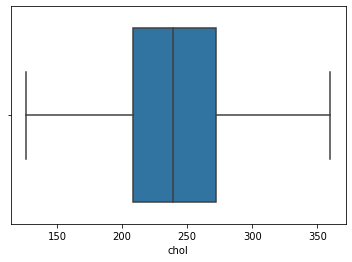

In [133]:
sns.boxplot(df["chol"])

### <font color = Red> fbs

In [134]:
df['fbs']

0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 303, dtype: int64

<AxesSubplot:xlabel='fbs'>

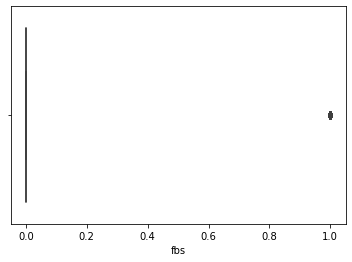

In [135]:
sns.boxplot(x = df['fbs'])

### <font color = Red> restecg

In [136]:
df['restecg']

0      0
1      1
2      0
3      1
4      1
      ..
298    1
299    1
300    1
301    1
302    0
Name: restecg, Length: 303, dtype: int64

<AxesSubplot:xlabel='restecg'>

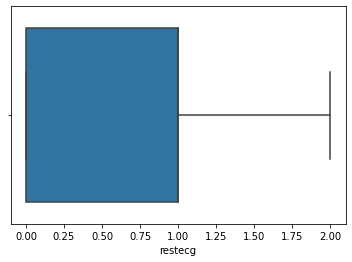

In [137]:
sns.boxplot(x =df['restecg'])

### <font color = Red> thalach

In [138]:
df['thalach']

0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64

<AxesSubplot:xlabel='thalach'>

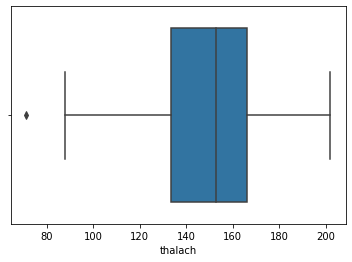

In [139]:
sns.boxplot(df['thalach'])

### <font color = Red> exang

In [140]:
df['exang']

0      0
1      0
2      0
3      0
4      1
      ..
298    1
299    0
300    0
301    1
302    0
Name: exang, Length: 303, dtype: int64

<AxesSubplot:xlabel='exang'>

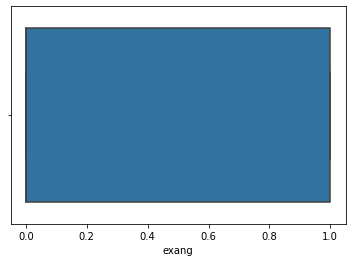

In [141]:
sns.boxplot(x = df['exang'])

### <font color = Red> oldpeak

In [142]:
df['oldpeak']

0      2.3
1      3.5
2      1.4
3      0.8
4      0.6
      ... 
298    0.2
299    1.2
300    3.4
301    1.2
302    0.0
Name: oldpeak, Length: 303, dtype: float64

<AxesSubplot:xlabel='oldpeak'>

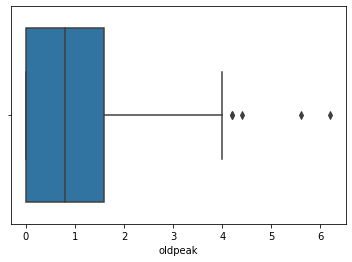

In [143]:
sns.boxplot(df['oldpeak'])

### <font color = Red> slope

In [144]:
df['slope']

0      0
1      0
2      2
3      2
4      2
      ..
298    1
299    1
300    1
301    1
302    1
Name: slope, Length: 303, dtype: int64

<AxesSubplot:xlabel='slope'>

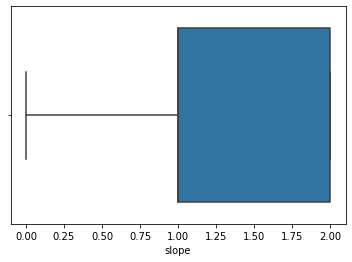

In [145]:
sns.boxplot(df['slope'])

### <font color = Red> ca

In [146]:
df['ca']

0      0
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    2
301    1
302    1
Name: ca, Length: 303, dtype: int64

<AxesSubplot:xlabel='ca'>

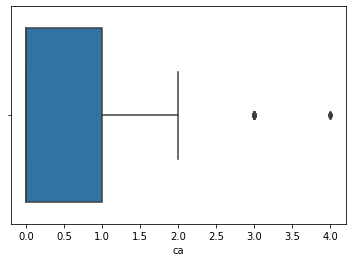

In [147]:
sns.boxplot(df['ca'])

### <font color = Red> thal

<AxesSubplot:xlabel='thal'>

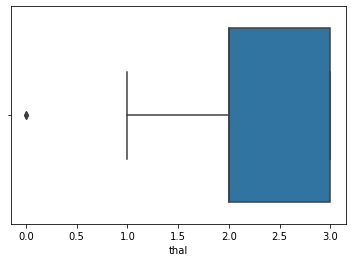

In [148]:
sns.boxplot(x = df[ 'thal'])

# Train Test Split

In [149]:

x = df.drop('target',axis =1)
y = df['target']

In [150]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=12,stratify=y)

In [151]:
x_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
255   45    1   0       142   309    0        0      147      1      0.0   
218   65    1   0       135   254    0        0      127      0      2.8   
137   62    1   1       128   208    1        0      140      0      0.0   
31    65    1   0       120   177    0        1      140      0      0.4   
169   53    1   0       140   203    1        0      155      1      3.1   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
116   41    1   2       130   214    0        0      168      0      2.0   
149   42    1   2       130   180    0        1      150      0      0.0   
259   38    1   3       120   231    0        1      182      1      3.8   
206   59    1   0       110   239    0        0      142      1      1.2   
59    57    0   0       128   303    0        0      159      0      0.0   

     slope  ca  thal  
255      1   3     3  
218      1   1     3  
137      2   0     2  
31       2   0     3  
169      0   0     3  
..     ...  ..   ...  
116      1   0     2  
149      2   0     2  
259      1   0     3  
206      1   1     3  
59       2   1     2  

[227 rows x 13 columns]

In [152]:
y_train

255    0
218    0
137    1
31     1
169    0
      ..
116    1
149    1
259    0
206    0
59     1
Name: target, Length: 227, dtype: int64

# <center><font color = Red> Logistic Algorithm

# Model Training

In [153]:
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

LogisticRegression()

## Model Evaluation

In [155]:
# Testing

y_pred = log_clf.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)

accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)

clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

accuracy_test = accuracy_score(y_test,y_pred)
print('accuracy>>',accuracy_train)
print()

precision = precision_score(y_test,y_pred)
print('precision>>',precision)
print()

Recall = recall_score(y_test,y_pred)
print('Recall>>',Recall)
print()

F1 = f1_score(y_test,y_pred)
print('F1>>',F1)


Confusion Matrix :
 [[22 13]
 [ 2 39]]
 Accuracy : 0.8026315789473685
Classication Report : 
               precision    recall  f1-score   support

           0       0.92      0.63      0.75        35
           1       0.75      0.95      0.84        41

    accuracy                           0.80        76
   macro avg       0.83      0.79      0.79        76
weighted avg       0.83      0.80      0.80        76

accuracy>> 0.9030837004405287

precision>> 0.75

Recall>> 0.9512195121951219

F1>> 0.8387096774193549


In [156]:
# Trainig

y_pred_train = log_clf.predict(x_train)

con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)

clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('accuracy>>',accuracy_train)
print()

precision = precision_score(y_train,y_pred_train)
print('precision>>',precision)
print()

Recall = recall_score(y_train,y_pred_train)
print('Recall>>',Recall)
print()

F1 = f1_score(y_train,y_pred_train)
print('F1>>',F1)


Confusion Matrix :
 [[ 84  19]
 [  8 116]]
Classication Report : 
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       103
           1       0.86      0.94      0.90       124

    accuracy                           0.88       227
   macro avg       0.89      0.88      0.88       227
weighted avg       0.88      0.88      0.88       227

accuracy>> 0.8810572687224669

precision>> 0.8592592592592593

Recall>> 0.9354838709677419

F1>> 0.8957528957528957


### <font color = Red> Confusion matrix


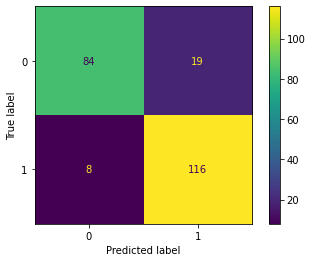

In [46]:
plot_confusion_matrix(log_clf,x_train,y_train)

### <font color = Red> ROC Curve

Text(0, 0.5, 'TPR')

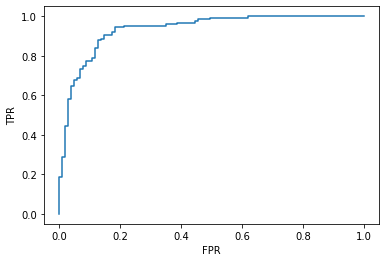

In [47]:
y_pred_proba = log_clf.predict_proba(x_train)
fpr,tpr,thresh = roc_curve(y_train,y_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [48]:
area = auc(fpr,tpr)
print('Area Under ROC Curve',area)

Area Under ROC Curve 0.9336830566865018


In [158]:
result_dict = {'accuracy_train':[],'accuracy_test': []}
index = []

In [160]:
# Logestic Regression

result_dict['accuracy_train'].append(accuracy_test)
result_dict['accuracy_test'].append(accuracy_train)
index.append('logistic_reg')

### <font color = Red> Over sampling

In [51]:
x = df.drop('target',axis = 1)
y = df['target']

smt = SMOTE()
x_new,y_new = smt.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,test_size=0.25,random_state=12,stratify=y_new)

### <font color = Red> Model Training Over sampling

In [157]:
log_model_over = LogisticRegression()
log_model_over.fit(x_train,y_train)

LogisticRegression()

### <font color = Red> Model Training

In [53]:
# Testing

y_pred = log_model_over.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)

acc_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",acc_test)

clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[31 10]
 [ 1 41]]
 Accuracy : 0.8674698795180723
Classication Report : 
               precision    recall  f1-score   support

           0       0.97      0.76      0.85        41
           1       0.80      0.98      0.88        42

    accuracy                           0.87        83
   macro avg       0.89      0.87      0.87        83
weighted avg       0.89      0.87      0.87        83



In [54]:
# Trainig

y_pred_train = log_model_over.predict(x_train)

con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)

acc_train = accuracy_score(y_train,y_pred_train)
print(" Accuracy :",acc_train)

clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[ 99  25]
 [ 16 107]]
 Accuracy : 0.8340080971659919
Classication Report : 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       124
           1       0.81      0.87      0.84       123

    accuracy                           0.83       247
   macro avg       0.84      0.83      0.83       247
weighted avg       0.84      0.83      0.83       247



In [55]:
# Logestic_Regression_After_Oversampling

result_dict['accuracy_train'].append(acc_test)
result_dict['accuracy_test'].append(acc_train)
index.append('logistic_after_oversampling')

# <center><font color = Red> KNN Algoritm

### 1. Train_test_split

In [56]:
x = df.drop('target',axis =1)
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=12,stratify=y)

### 2. Feature_Engineering

### 2.1. Normal_Scaler

In [57]:
normal_scaler = MinMaxScaler()
array = normal_scaler.fit_transform(x)
x_nor_df = pd.DataFrame(array,columns=x.columns)
x_nor_df

age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    0.708333  1.0  1.000000  0.671053  0.457265  1.0      0.0  0.603053   
1    0.166667  1.0  0.666667  0.473684  0.529915  0.0      0.5  0.885496   
2    0.250000  0.0  0.333333  0.473684  0.333333  0.0      0.0  0.770992   
3    0.562500  1.0  0.333333  0.342105  0.470085  0.0      0.5  0.816794   
4    0.583333  0.0  0.000000  0.342105  0.974359  0.0      0.5  0.702290   
..        ...  ...       ...       ...       ...  ...      ...       ...   
298  0.583333  0.0  0.000000  0.605263  0.491453  0.0      0.5  0.396947   
299  0.333333  1.0  1.000000  0.210526  0.589744  0.0      0.5  0.465649   
300  0.812500  1.0  0.000000  0.657895  0.286325  1.0      0.5  0.534351   
301  0.583333  1.0  0.000000  0.473684  0.021368  0.0      0.5  0.335878   
302  0.583333  0.0  0.333333  0.473684  0.470085  0.0      0.0  0.786260   

     exang   oldpeak  slope    ca      thal  
0      0.0  0.370968    0.0  0.00  0.333333  
1      0.0  0.564516    0.0  0.00  0.666667  
2      0.0  0.225806    1.0  0.00  0.666667  
3      0.0  0.129032    1.0  0.00  0.666667  
4      1.0  0.096774    1.0  0.00  0.666667  
..     ...       ...    ...   ...       ...  
298    1.0  0.032258    0.5  0.00  1.000000  
299    0.0  0.193548    0.5  0.00  1.000000  
300    0.0  0.548387    0.5  0.50  1.000000  
301    1.0  0.193548    0.5  0.25  1.000000  
302    0.0  0.000000    0.5  0.25  0.666667  

[303 rows x 13 columns]

### 2.2. Standard_Scaler

In [58]:
std_scaler = StandardScaler()
array = std_scaler.fit_transform(x)
x1_std_df = pd.DataFrame(array,columns=x.columns)
x1_std_df                        

age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.986912 -0.174334  2.394438 -1.005832   
1   -1.915313  0.681005  1.002577 -0.006118  0.188053 -0.417635  0.898962   
2   -1.474158 -1.468418  0.032031 -0.006118 -0.792524 -0.417635 -1.005832   
3    0.180175  0.681005  0.032031 -0.668138 -0.110384 -0.417635  0.898962   
4    0.290464 -1.468418 -0.938515 -0.668138  2.405011 -0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464 -1.468418 -0.938515  0.655902 -0.003799 -0.417635  0.898962   
299 -1.033002  0.681005  1.973123 -1.330157  0.486490 -0.417635  0.898962   
300  1.503641  0.681005 -0.938515  0.920710 -1.027010  2.394438  0.898962   
301  0.290464  0.681005 -0.938515 -0.006118 -2.348658 -0.417635  0.898962   
302  0.290464 -1.468418  0.032031 -0.006118 -0.110384 -0.417635 -1.005832   

      thalach     exang   oldpeak     slope        ca      thal  
0    0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.148873  
1    1.633471 -0.696631  2.122573 -2.274579 -0.714429 -0.512922  
2    0.977514 -0.696631  0.310912  0.976352 -0.714429 -0.512922  
3    1.239897 -0.696631 -0.206705  0.976352 -0.714429 -0.512922  
4    0.583939  1.435481 -0.379244  0.976352 -0.714429 -0.512922  
..        ...       ...       ...       ...       ...       ...  
298 -1.165281  1.435481 -0.724323 -0.649113 -0.714429  1.123029  
299 -0.771706 -0.696631  0.138373 -0.649113 -0.714429  1.123029  
300 -0.378132 -0.696631  2.036303 -0.649113  1.244593  1.123029  
301 -1.515125  1.435481  0.138373 -0.649113  0.265082  1.123029  
302  1.064975 -0.696631 -0.896862 -0.649113  0.265082 -0.512922  

[303 rows x 13 columns]

# For Normal Scalar

In [59]:
x = x_nor_df
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=12, stratify=y)

### 3. Model_Training

In [60]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

### 4. Model_Evaluation

In [61]:
# Testing

y_pred = knn_model.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)

accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)

clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[24 11]
 [ 2 39]]
 Accuracy : 0.8289473684210527
Classication Report : 
               precision    recall  f1-score   support

           0       0.92      0.69      0.79        35
           1       0.78      0.95      0.86        41

    accuracy                           0.83        76
   macro avg       0.85      0.82      0.82        76
weighted avg       0.85      0.83      0.82        76



In [62]:
# Trainig

y_pred_train = knn_model.predict(x_train)

con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)

accuracy_train = accuracy_score(y_train,y_pred_train)
print(" Accuracy :",accuracy_train)

clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[ 84  19]
 [ 12 112]]
 Accuracy : 0.8634361233480177
Classication Report : 
               precision    recall  f1-score   support

           0       0.88      0.82      0.84       103
           1       0.85      0.90      0.88       124

    accuracy                           0.86       227
   macro avg       0.86      0.86      0.86       227
weighted avg       0.86      0.86      0.86       227



In [63]:
# KNN Classifier Normal

result_dict['accuracy_train'].append(accuracy_test)
result_dict['accuracy_test'].append(accuracy_train)
index.append('KNN_Model_Normal')

### 5. Hyperparameter_Tuning

In [64]:
knn_clf = KNeighborsClassifier()
hyperparameters = {"n_neighbors" : np.arange(3,30), 'p' :[1,2]}
gscv_knn_clf = GridSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train, y_train)
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=4, p=1)

### 5.1 Model_Evaluation

In [65]:
# Testing

knn_model_Norm_hyp = gscv_knn_clf.best_estimator_

y_pred = knn_model_Norm_hyp.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)

accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)

clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[29  6]
 [ 3 38]]
 Accuracy : 0.881578947368421
Classication Report : 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.86      0.93      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [66]:
# Trainig

y_pred_train = knn_model_Norm_hyp.predict(x_train)

con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)

accuracy_train = accuracy_score(y_train,y_pred_train)
print(" Accuracy :",accuracy_train)

clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[ 93  10]
 [ 17 107]]
 Accuracy : 0.8810572687224669
Classication Report : 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       103
           1       0.91      0.86      0.89       124

    accuracy                           0.88       227
   macro avg       0.88      0.88      0.88       227
weighted avg       0.88      0.88      0.88       227



In [67]:
# KNN Classifier Normal After Hyper

result_dict['accuracy_train'].append(accuracy_test)
result_dict['accuracy_test'].append(accuracy_train)
index.append('KNN_Model_Normal_with_hyp')

# For Std_Scalar

In [68]:
x = x1_std_df
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=12, stratify=y)

### 6. Model_Training

In [69]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

### 7. Model_Evaluation

In [70]:
# Testing

y_pred = knn_model.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)

accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)

clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[23 12]
 [ 5 36]]
 Accuracy : 0.7763157894736842
Classication Report : 
               precision    recall  f1-score   support

           0       0.82      0.66      0.73        35
           1       0.75      0.88      0.81        41

    accuracy                           0.78        76
   macro avg       0.79      0.77      0.77        76
weighted avg       0.78      0.78      0.77        76



In [71]:
# Trainig

y_pred_train = knn_model.predict(x_train)

con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)

accuracy_train = accuracy_score(y_train,y_pred_train)
print(" Accuracy :",accuracy_train)

clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[ 84  19]
 [ 10 114]]
 Accuracy : 0.8722466960352423
Classication Report : 
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       103
           1       0.86      0.92      0.89       124

    accuracy                           0.87       227
   macro avg       0.88      0.87      0.87       227
weighted avg       0.87      0.87      0.87       227



In [72]:
# KNN Classifier STD

result_dict['accuracy_train'].append(accuracy_test)
result_dict['accuracy_test'].append(accuracy_train)
index.append('KNN_Model_STD')

### 8. Hyperparameter_Tunning

In [73]:
knn_clf = KNeighborsClassifier()
hyperparameter = {"n_neighbors" : np.arange(2,10),'p' :[1,2]}

gscv_knn_clf = GridSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train, y_train)
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=11)

### 9. Mode_Evaluation

In [74]:
# Testing

knn_model_hyp = gscv_knn_clf.best_estimator_

y_pred = knn_model_hyp.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)

accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)

clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[21 14]
 [ 2 39]]
 Accuracy : 0.7894736842105263
Classication Report : 
               precision    recall  f1-score   support

           0       0.91      0.60      0.72        35
           1       0.74      0.95      0.83        41

    accuracy                           0.79        76
   macro avg       0.82      0.78      0.78        76
weighted avg       0.82      0.79      0.78        76



In [75]:
# Trainig

y_pred_train = knn_model_hyp.predict(x_train)

con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)

accuracy_train = accuracy_score(y_train,y_pred_train)
print(" Accuracy :",accuracy_train)

clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[ 77  26]
 [  8 116]]
 Accuracy : 0.8502202643171806
Classication Report : 
               precision    recall  f1-score   support

           0       0.91      0.75      0.82       103
           1       0.82      0.94      0.87       124

    accuracy                           0.85       227
   macro avg       0.86      0.84      0.85       227
weighted avg       0.86      0.85      0.85       227



In [76]:
# KNN Classifier STD After Hyper

result_dict['accuracy_train'].append(accuracy_test)
result_dict['accuracy_test'].append(accuracy_train)
index.append('KNN_Model_STD_with_Hyp')

# c] Decision_Tree

### 1.Train_Test_Split

In [77]:
x = df.drop('target',axis =1)
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=12,stratify=y)

In [78]:
x_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
255   45    1   0       142   309    0        0      147      1      0.0   
218   65    1   0       135   254    0        0      127      0      2.8   
137   62    1   1       128   208    1        0      140      0      0.0   
31    65    1   0       120   177    0        1      140      0      0.4   
169   53    1   0       140   203    1        0      155      1      3.1   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
116   41    1   2       130   214    0        0      168      0      2.0   
149   42    1   2       130   180    0        1      150      0      0.0   
259   38    1   3       120   231    0        1      182      1      3.8   
206   59    1   0       110   239    0        0      142      1      1.2   
59    57    0   0       128   303    0        0      159      0      0.0   

     slope  ca  thal  
255      1   3     3  
218      1   1     3  
137      2   0     2  
31       2   0     3  
169      0   0     3  
..     ...  ..   ...  
116      1   0     2  
149      2   0     2  
259      1   0     3  
206      1   1     3  
59       2   1     2  

[227 rows x 13 columns]

# <center><font color = Red> Decision Tree Algorithm

### 2. Model_Training

In [79]:
dec_model =DecisionTreeClassifier()
dec_model.fit(x_train,y_train)

DecisionTreeClassifier()

### 3. Model_Evaluation

In [80]:
# Testing

y_pred = dec_model.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)

accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)

clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[19 16]
 [11 30]]
 Accuracy : 0.6447368421052632
Classication Report : 
               precision    recall  f1-score   support

           0       0.63      0.54      0.58        35
           1       0.65      0.73      0.69        41

    accuracy                           0.64        76
   macro avg       0.64      0.64      0.64        76
weighted avg       0.64      0.64      0.64        76



In [81]:
# Trainig

y_pred_train = dec_model.predict(x_train)

con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)

accuracy_train = accuracy_score(y_train,y_pred_train)
print(" Accuracy :",accuracy_train)

clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[103   0]
 [  0 124]]
 Accuracy : 1.0
Classication Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       124

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



In [82]:
plt.figure(figsize=(200,150))
plot_tree(dec_model, feature_names=x.columns, class_names=['0','1'],filled=True)
plt.savefig('Decision_Tree_without_HYP.jpg')

In [83]:
# Decision_Tree

result_dict['accuracy_train'].append(accuracy_test)
result_dict['accuracy_test'].append(accuracy_train)
index.append("Decision_Tree")

### 4. Hyperparameter_Tuning

In [84]:
decision_model = DecisionTreeClassifier()
hyperparameter = {'criterion':['gini','entropy'],
         'max_depth':np.arange(2,10),
         'min_samples_split' : np.arange(2,20),
         'min_samples_leaf' : np.arange(2,15),}
gscv_dec_model = GridSearchCV(decision_model,hyperparameter,cv=5)
gscv_dec_model.fit(x_train,y_train)
gscv_dec_model.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=7)

### 5. Model_Evaluation

In [85]:
# Testing

dec_model_hyp =gscv_dec_model.best_estimator_

y_pred = dec_model_hyp.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)

accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)

clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[21 14]
 [11 30]]
 Accuracy : 0.6710526315789473
Classication Report : 
               precision    recall  f1-score   support

           0       0.66      0.60      0.63        35
           1       0.68      0.73      0.71        41

    accuracy                           0.67        76
   macro avg       0.67      0.67      0.67        76
weighted avg       0.67      0.67      0.67        76



In [86]:
# Trainig

y_pred_train = dec_model_hyp.predict(x_train)

con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)

accuracy_train = accuracy_score(y_train,y_pred_train)
print(" Accuracy :",accuracy_train)

clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[ 85  18]
 [  8 116]]
 Accuracy : 0.8854625550660793
Classication Report : 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       103
           1       0.87      0.94      0.90       124

    accuracy                           0.89       227
   macro avg       0.89      0.88      0.88       227
weighted avg       0.89      0.89      0.88       227



In [87]:
plt.figure(figsize=(200,150))
plot_tree(dec_model, feature_names=x.columns, class_names=['0','1'],filled=True)
plt.savefig('Decision_Tree_with_HYP.jpg')

In [88]:
# Decision_Tree after_hyp

result_dict['accuracy_train'].append(accuracy_test)
result_dict['accuracy_test'].append(accuracy_train)
index.append("Decision_Tree_With_Hyper")

# <center><font color = Red>  Random Forest Algorithm

### 1. Train_Test_Split

In [89]:
x = df.drop('target',axis =1)
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=12,stratify=y)

### 2. Model_Training

In [90]:
ran_Model = RandomForestClassifier()
ran_Model.fit(x_train,y_train)

RandomForestClassifier()

### 3. Model Evaluation

In [91]:
# Testing

y_pred = ran_Model.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)

accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)

clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[22 13]
 [ 2 39]]
 Accuracy : 0.8026315789473685
Classication Report : 
               precision    recall  f1-score   support

           0       0.92      0.63      0.75        35
           1       0.75      0.95      0.84        41

    accuracy                           0.80        76
   macro avg       0.83      0.79      0.79        76
weighted avg       0.83      0.80      0.80        76



In [92]:
# Trainig

y_pred_train = ran_Model.predict(x_train)

con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)

accuracy_train = accuracy_score(y_train,y_pred_train)
print(" Accuracy :",accuracy_train)

clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[103   0]
 [  0 124]]
 Accuracy : 1.0
Classication Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       124

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



In [93]:
# Random_Forest

result_dict['accuracy_train'].append(accuracy_test)
result_dict['accuracy_test'].append(accuracy_train)
index.append("RandoM_Forest")

### 4. Hyperparameter Tuning

In [94]:
rf_model = RandomForestClassifier()
hyperparameters = { "n_estimators" :np.arange(10,150),
                     "criterion" : ['gini','entropy'],
                     "max_depth" : np.arange(2, 10),
                     "min_samples_split" : np.arange(3,20),
                     "min_samples_leaf" : np.arange(3,15),
                     "oob_score" : [True],
                     "random_state" : [12]}

rscv_rf_model = RandomizedSearchCV(rf_model,hyperparameters,cv = 5)
rscv_rf_model.fit(x_train, y_train)
rscv_rf_model.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=12,
                       n_estimators=50, oob_score=True, random_state=12)

In [95]:
# Testing

ran_model_hyp = rscv_rf_model.best_estimator_

y_pred = ran_model_hyp.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)

accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)

clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[19 16]
 [ 4 37]]
 Accuracy : 0.7368421052631579
Classication Report : 
               precision    recall  f1-score   support

           0       0.83      0.54      0.66        35
           1       0.70      0.90      0.79        41

    accuracy                           0.74        76
   macro avg       0.76      0.72      0.72        76
weighted avg       0.76      0.74      0.73        76



In [96]:
# Trainig

y_pred_train = ran_model_hyp.predict(x_train)

con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)

accuracy_train = accuracy_score(y_train,y_pred_train)
print(" Accuracy :",accuracy_train)

clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[ 84  19]
 [  3 121]]
 Accuracy : 0.9030837004405287
Classication Report : 
               precision    recall  f1-score   support

           0       0.97      0.82      0.88       103
           1       0.86      0.98      0.92       124

    accuracy                           0.90       227
   macro avg       0.91      0.90      0.90       227
weighted avg       0.91      0.90      0.90       227



In [97]:
# Random_Forest_After_Hyper

result_dict['accuracy_train'].append(accuracy_test)
result_dict['accuracy_test'].append(accuracy_train)
index.append("Random_Forest_with_hyp(rscv)")

#  <center><font color = Red> ❖ Final Result ❖ 

In [98]:
Final_Result_df = pd.DataFrame(result_dict,index =index )
Final_Result_df

accuracy_train  accuracy_test
logistic_reg                        0.802632       0.881057
logistic_after_oversampling         0.867470       0.834008
KNN_Model_Normal                    0.828947       0.863436
KNN_Model_Normal_with_hyp           0.881579       0.881057
KNN_Model_STD                       0.776316       0.872247
KNN_Model_STD_with_Hyp              0.789474       0.850220
Decision_Tree                       0.644737       1.000000
Decision_Tree_With_Hyper            0.671053       0.885463
RandoM_Forest                       0.802632       1.000000
Random_Forest_with_hyp(rscv)        0.736842       0.903084

<AxesSubplot:>

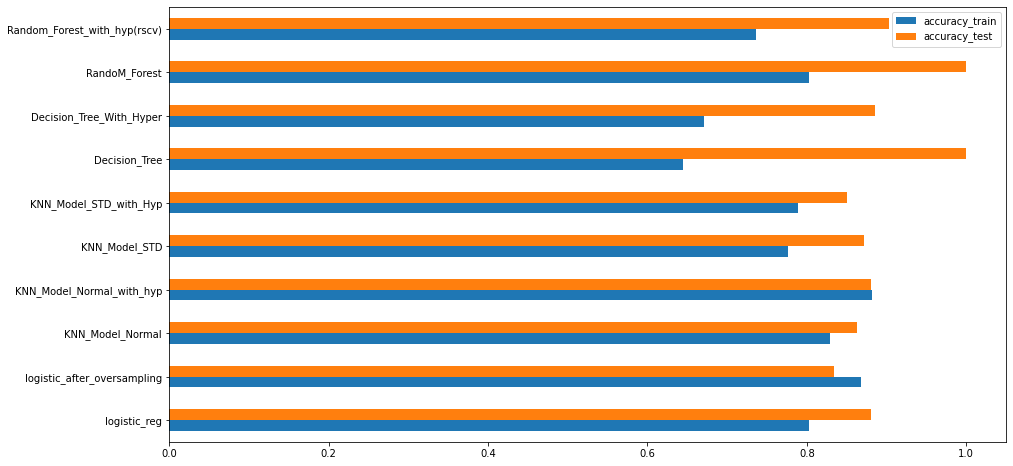

In [162]:
Final_Result_df.plot(kind = 'barh',figsize =(15,8))

# <font color = Green> ❖ Result

# KNN CLASSIFIER NORMALISING WITH HYPERPARAMETER 
# TUNING GIVES BEST RESULT ON HEART DATASET

## TEST ACCURACY = 0.881057

## TRAIN ACCURACY = 0.881579

## <font color = Blue> Testing on single row by using Resultant Model.

In [100]:
x.head(1).T

0
age        63.0
sex         1.0
cp          3.0
trestbps  145.0
chol      233.0
fbs         1.0
restecg     0.0
thalach   150.0
exang       0.0
oldpeak     2.3
slope       0.0
ca          0.0
thal        1.0

In [101]:
heart_data = {'columns' : list(x.columns)}
heart_data

{'columns': ['age',
  'sex',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalach',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal']}

In [102]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [103]:
column = x.columns
column

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [104]:
age=41
sex=0
cp=1
trestbps=130
chol=204
fbs=0
restecg=0
thalach=172
exang=0
oldpeak=1.4
slope=2
ca=0
thal=2

# target >> 1

In [105]:
test_array = np.zeros(x.shape[1])
test_array[0] = age
test_array[1] = sex
test_array[2] = cp
test_array[3] = trestbps
test_array[4] = chol
test_array[5] = fbs
test_array[6] = restecg
test_array[7] = thalach
test_array[8] = exang
test_array[9] = oldpeak
test_array[10] = slope
test_array[11] = ca
test_array[12] = thal

test_array

array([ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
         1.4,   2. ,   0. ,   2. ])

In [106]:
knn_model_Norm_hyp.predict([test_array])[0]

1

## Create Pickle & Json File

In [107]:
with open("knn_clf_hyp.pkl",'wb') as f:
    pickle.dump(knn_model_Norm_hyp,f)

In [108]:
with open("heart_data.json",'w') as f:
    json.dump(heart_data,f)

In [109]:
class Heart:
    def __init__(self,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal):
        self.age = age
        self.sex = sex
        self.cp = cp
        self.trestbps = trestbps
        self.chol = chol
        self.fbs = fbs
        self.restecg = restecg
        self.thalach = thalach
        self.exang = exang
        self.oldpeak = oldpeak
        self.slope = slope
        self.ca = ca
        self.thal = thal
        
    def get_data(self):
        with open("knn_clf_hyp.pkl",'rb') as f:
            self.model = pickle.load(f)
        with open("heart_data.json",'r') as f:
            self.heart_data = json.load(f)
        
    def Disease_predict(self):
        self.get_data()
        test_array = np.zeros(len(self.heart_data['columns']))
        test_array[0] = age
        test_array[1] = sex
        test_array[2] = cp
        test_array[3] = trestbps
        test_array[4] = chol
        test_array[5] = fbs
        test_array[6] = restecg
        test_array[7] = thalach
        test_array[8] = exang
        test_array[9] = oldpeak
        test_array[10] = slope
        test_array[11] = ca
        test_array[12] = thal
        
        price = self.model.predict([test_array])
        return price[0]
    
obj = Heart(41,0,1,130,204,0,0,172,0,1.4,2,0,2)
obj.Disease_predict()

1

In [110]:
test_array

array([ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
         1.4,   2. ,   0. ,   2. ])